# Credit Risk Score Prediction

Develop predictive models that can determine someone’s credit risk 0 - high risk, 1-low risk .

The goal of this competition is to allow you to develop predictive models that can determine given a particular individual whether their credit risk is high denoted by 0 or low denoted by1.  As such, the goal would be to develop the best binary classification model.

Description

id - unique identifier  
F1 - Continuous value describing number of years since last degree was completed  
F2 - Continuous value indicating hours worked per week  
F3 - Categorical Value  
F4 - Categorical Value indicating type of occupation  
F5 - continuous value denoting gains  
F6 - continuous value denoting loss  
F7 - Categorical value denoting marital status  
F8 - Categorical value denoting type of employment (e.g., Self)  
F9 - Categorical Value denoting education type  
F10 - Categorical Value denoting different race  
F11 - Categorical - Female/Male  
credit - 0: Bad, 1: Good  

Continuous variables  
F1, F2, F5, F6

Categorical variables  
F3, F4, F7, F8, F9, F10, F11

## Load dataset

In [2]:
import pandas as pd

In [76]:
train_df = pd.read_csv(r"C:\Users\spurohit\Desktop\sacith hw\hw2\train.csv")
test_df = pd.read_csv(r"C:\Users\spurohit\Desktop\sacith hw\hw2\test.csv")

In [77]:
train_df.head(3)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,credit
0,0,13,40,1,1,2174,0,4,7,9,White,Male,0
1,1,13,13,0,4,0,0,2,6,9,White,Male,0
2,2,9,40,1,6,0,0,0,4,11,White,Male,0


In [78]:
test_df.head(3)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,0,7,40,3,7,0,0,4,4,1,Black,Male
1,1,12,40,0,11,0,0,2,2,7,White,Male
2,2,10,40,0,7,7688,0,2,4,15,Black,Male


## Data info

In [79]:
train_df.describe()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,credit
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,16280.000000,10.080679,40.437456,1.446362,6.572740,1077.648844,87.303830,2.611836,3.868892,10.298210,0.240810
std,9399.695394,2.572720,12.347429,1.606771,4.228857,7385.292085,402.960219,1.506222,1.455960,3.870264,0.427581
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8140.000000,9.000000,40.000000,0.000000,3.000000,0.000000,0.000000,2.000000,4.000000,9.000000,0.000000
50%,16280.000000,10.000000,40.000000,1.000000,7.000000,0.000000,0.000000,2.000000,4.000000,11.000000,0.000000
75%,24420.000000,12.000000,45.000000,3.000000,10.000000,0.000000,0.000000,4.000000,4.000000,12.000000,0.000000
max,32560.000000,16.000000,99.000000,5.000000,14.000000,99999.000000,4356.000000,6.000000,8.000000,15.000000,1.000000


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      32561 non-null  int64 
 1   F1      32561 non-null  int64 
 2   F2      32561 non-null  int64 
 3   F3      32561 non-null  int64 
 4   F4      32561 non-null  int64 
 5   F5      32561 non-null  int64 
 6   F6      32561 non-null  int64 
 7   F7      32561 non-null  int64 
 8   F8      32561 non-null  int64 
 9   F9      32561 non-null  int64 
 10  F10     32561 non-null  object
 11  F11     32561 non-null  object
 12  credit  32561 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 3.2+ MB


In [80]:
test_df.describe()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,13305.000000,13305.000000,13305.000000,13305.000000,13305.000000,13305.00000,13305.000000,13305.000000,13305.000000,13305.000000
mean,6652.000000,10.056219,40.440060,1.433521,6.566554,1073.79519,86.015558,2.630064,3.864337,10.260579
std,3840.967001,2.554516,12.450837,1.587862,4.237440,7588.57255,398.905493,1.513796,1.483679,3.884839
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3326.000000,9.000000,40.000000,0.000000,3.000000,0.00000,0.000000,2.000000,4.000000,9.000000
50%,6652.000000,10.000000,40.000000,1.000000,7.000000,0.00000,0.000000,2.000000,4.000000,11.000000
75%,9978.000000,12.000000,45.000000,3.000000,10.000000,0.00000,0.000000,4.000000,4.000000,12.000000
max,13304.000000,16.000000,99.000000,5.000000,14.000000,99999.00000,3770.000000,6.000000,8.000000,15.000000


In [82]:
for i in range(1,12):
    print('F'+str(i), train_df['F'+str(i)].unique())

F1 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
F2 [40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]
F3 [1 0 5 3 4 2]
F4 [ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
F5 [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3

## EDA

In [58]:
# replace field that's entirely space (or empty) with NaN
train_df = train_df.replace(r'^\s*$', np.nan, regex=True)

print("Preview of data:")
display(train_df.head(3))

print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
print(train_df.info())

# generate preview of entries with null values
if train_df.isnull().any(axis=None):
    print("\nPreview of data with null values:")
    display(train_df[train_df.isnull().any(axis=1)].head(3))
    missingno.matrix(train_df)
    plt.show()

# generate count statistics of duplicate entries
if len(train_df[train_df.duplicated()]) > 0:
    print("\n***Number of duplicated entries: ", len(train_df[train_df.duplicated()]))
    display(train_df[train_df.duplicated(keep=False)].sort_values(by=list(train_df.columns)).head())
else:
    print("\nNo duplicated entries found")

Preview of data:


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,credit
0,0,13,40,1,1,2174,0,4,7,9,White,Male,0
1,1,13,13,0,4,0,0,2,6,9,White,Male,0
2,2,9,40,1,6,0,0,0,4,11,White,Male,0



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      32561 non-null  int64 
 1   F1      32561 non-null  int64 
 2   F2      32561 non-null  int64 
 3   F3      32561 non-null  int64 
 4   F4      32561 non-null  int64 
 5   F5      32561 non-null  int64 
 6   F6      32561 non-null  int64 
 7   F7      32561 non-null  int64 
 8   F8      32561 non-null  int64 
 9   F9      32561 non-null  int64 
 10  F10     32561 non-null  object
 11  F11     32561 non-null  object
 12  credit  32561 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 3.2+ MB
None

No duplicated entries found


In [11]:
import matplotlib.pyplot as plt
import matplotlib

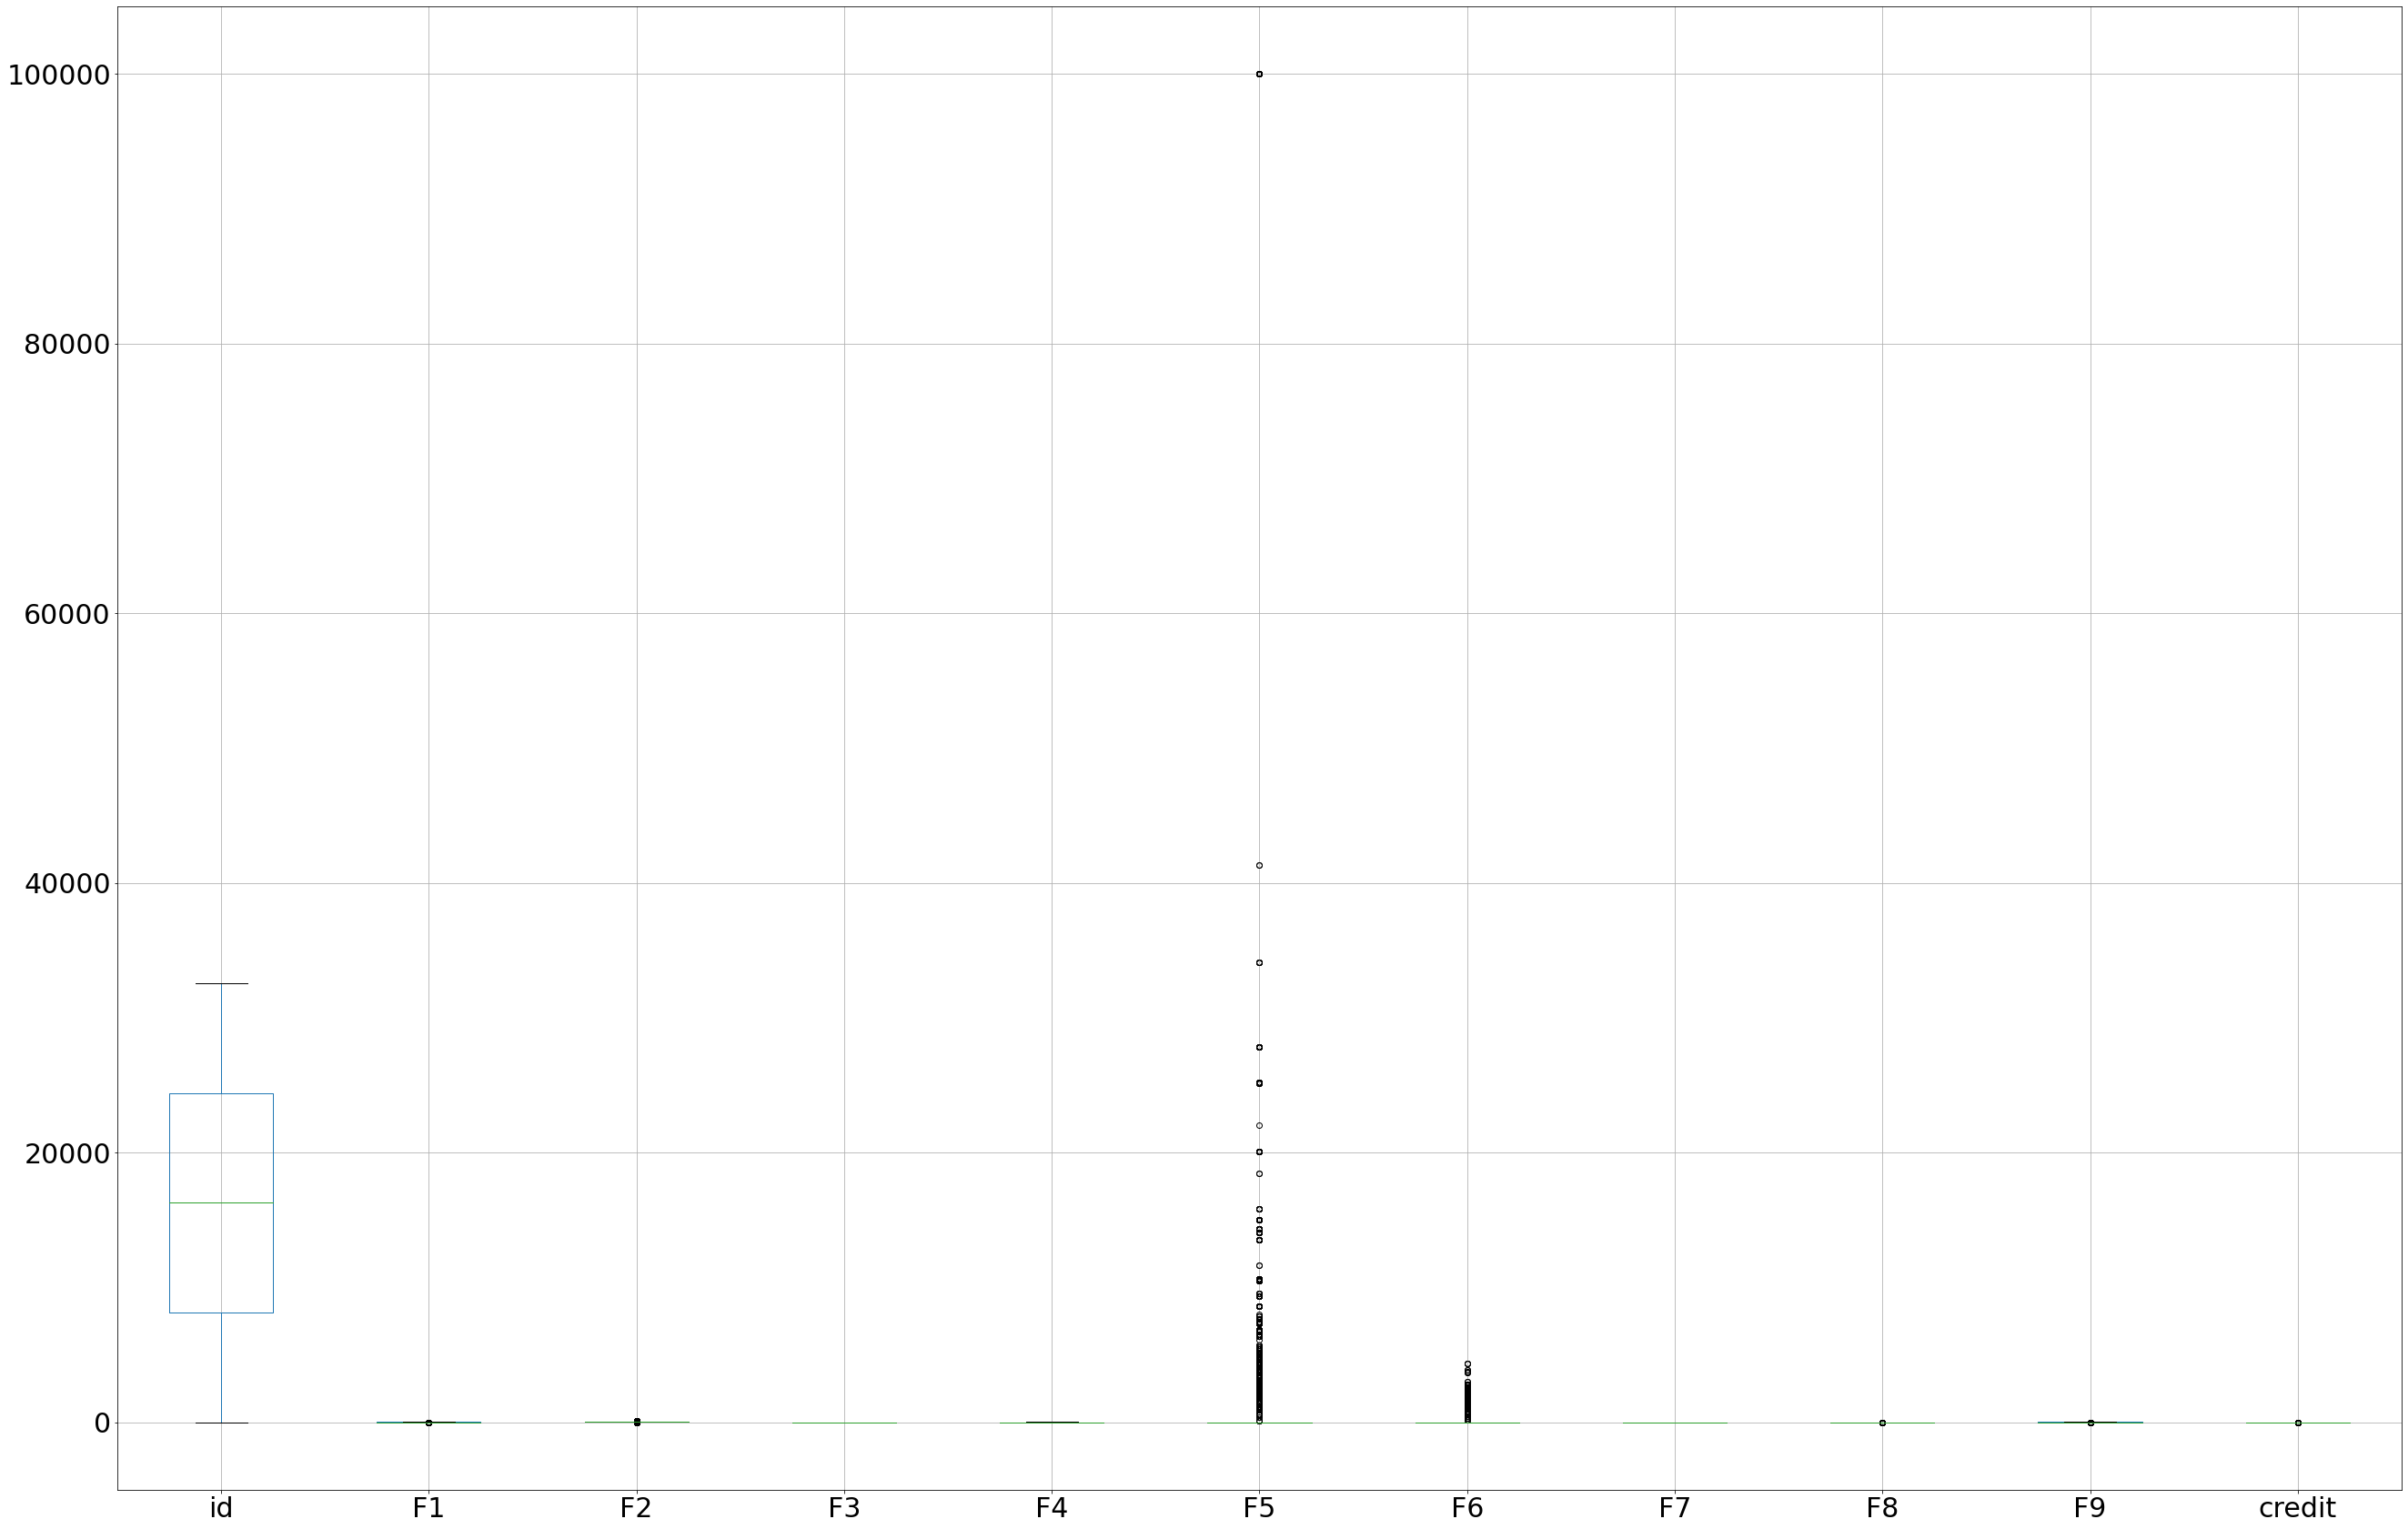

In [14]:
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
train_df.iloc[:, :].boxplot(fontsize = 30, figsize=(45,30))

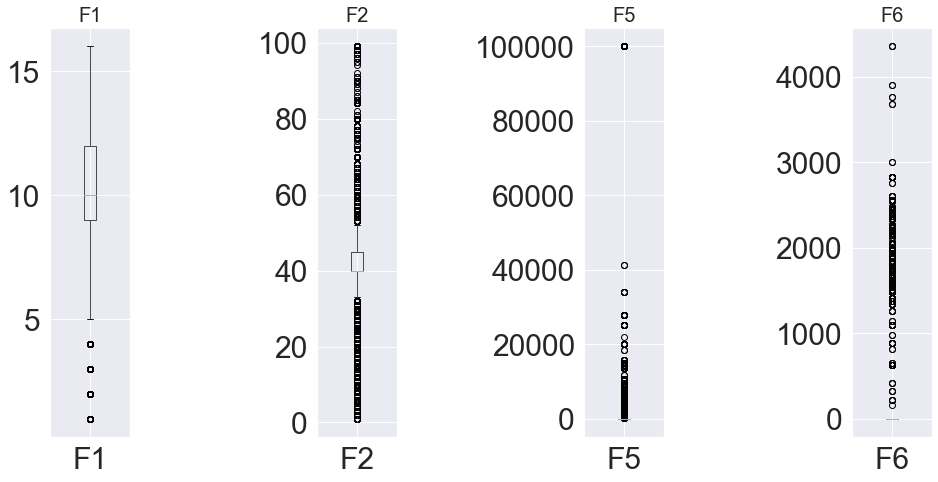

In [50]:
# check for outliers

continuous_labels = 'F1 F2 F5 F6'.split()
i = 1
plt.figure(figsize=(15,30))
for var in continuous_labels: #plotting boxplot for each variable
    plt.subplot(round(len(continuous_labels),0)/3+3,4,i)
    #plt.boxplot(train_df[var],whis=5, fontsize=20)
    train_df.loc[:, [var]].boxplot(fontsize = 30)
    plt.title(var, fontsize=20)
    i+=1
plt.tight_layout()
plt.show()

Analyis --
There is a definite outlier in F5 and some in f6 as well.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014213F6FC18>,
      dtype=object)

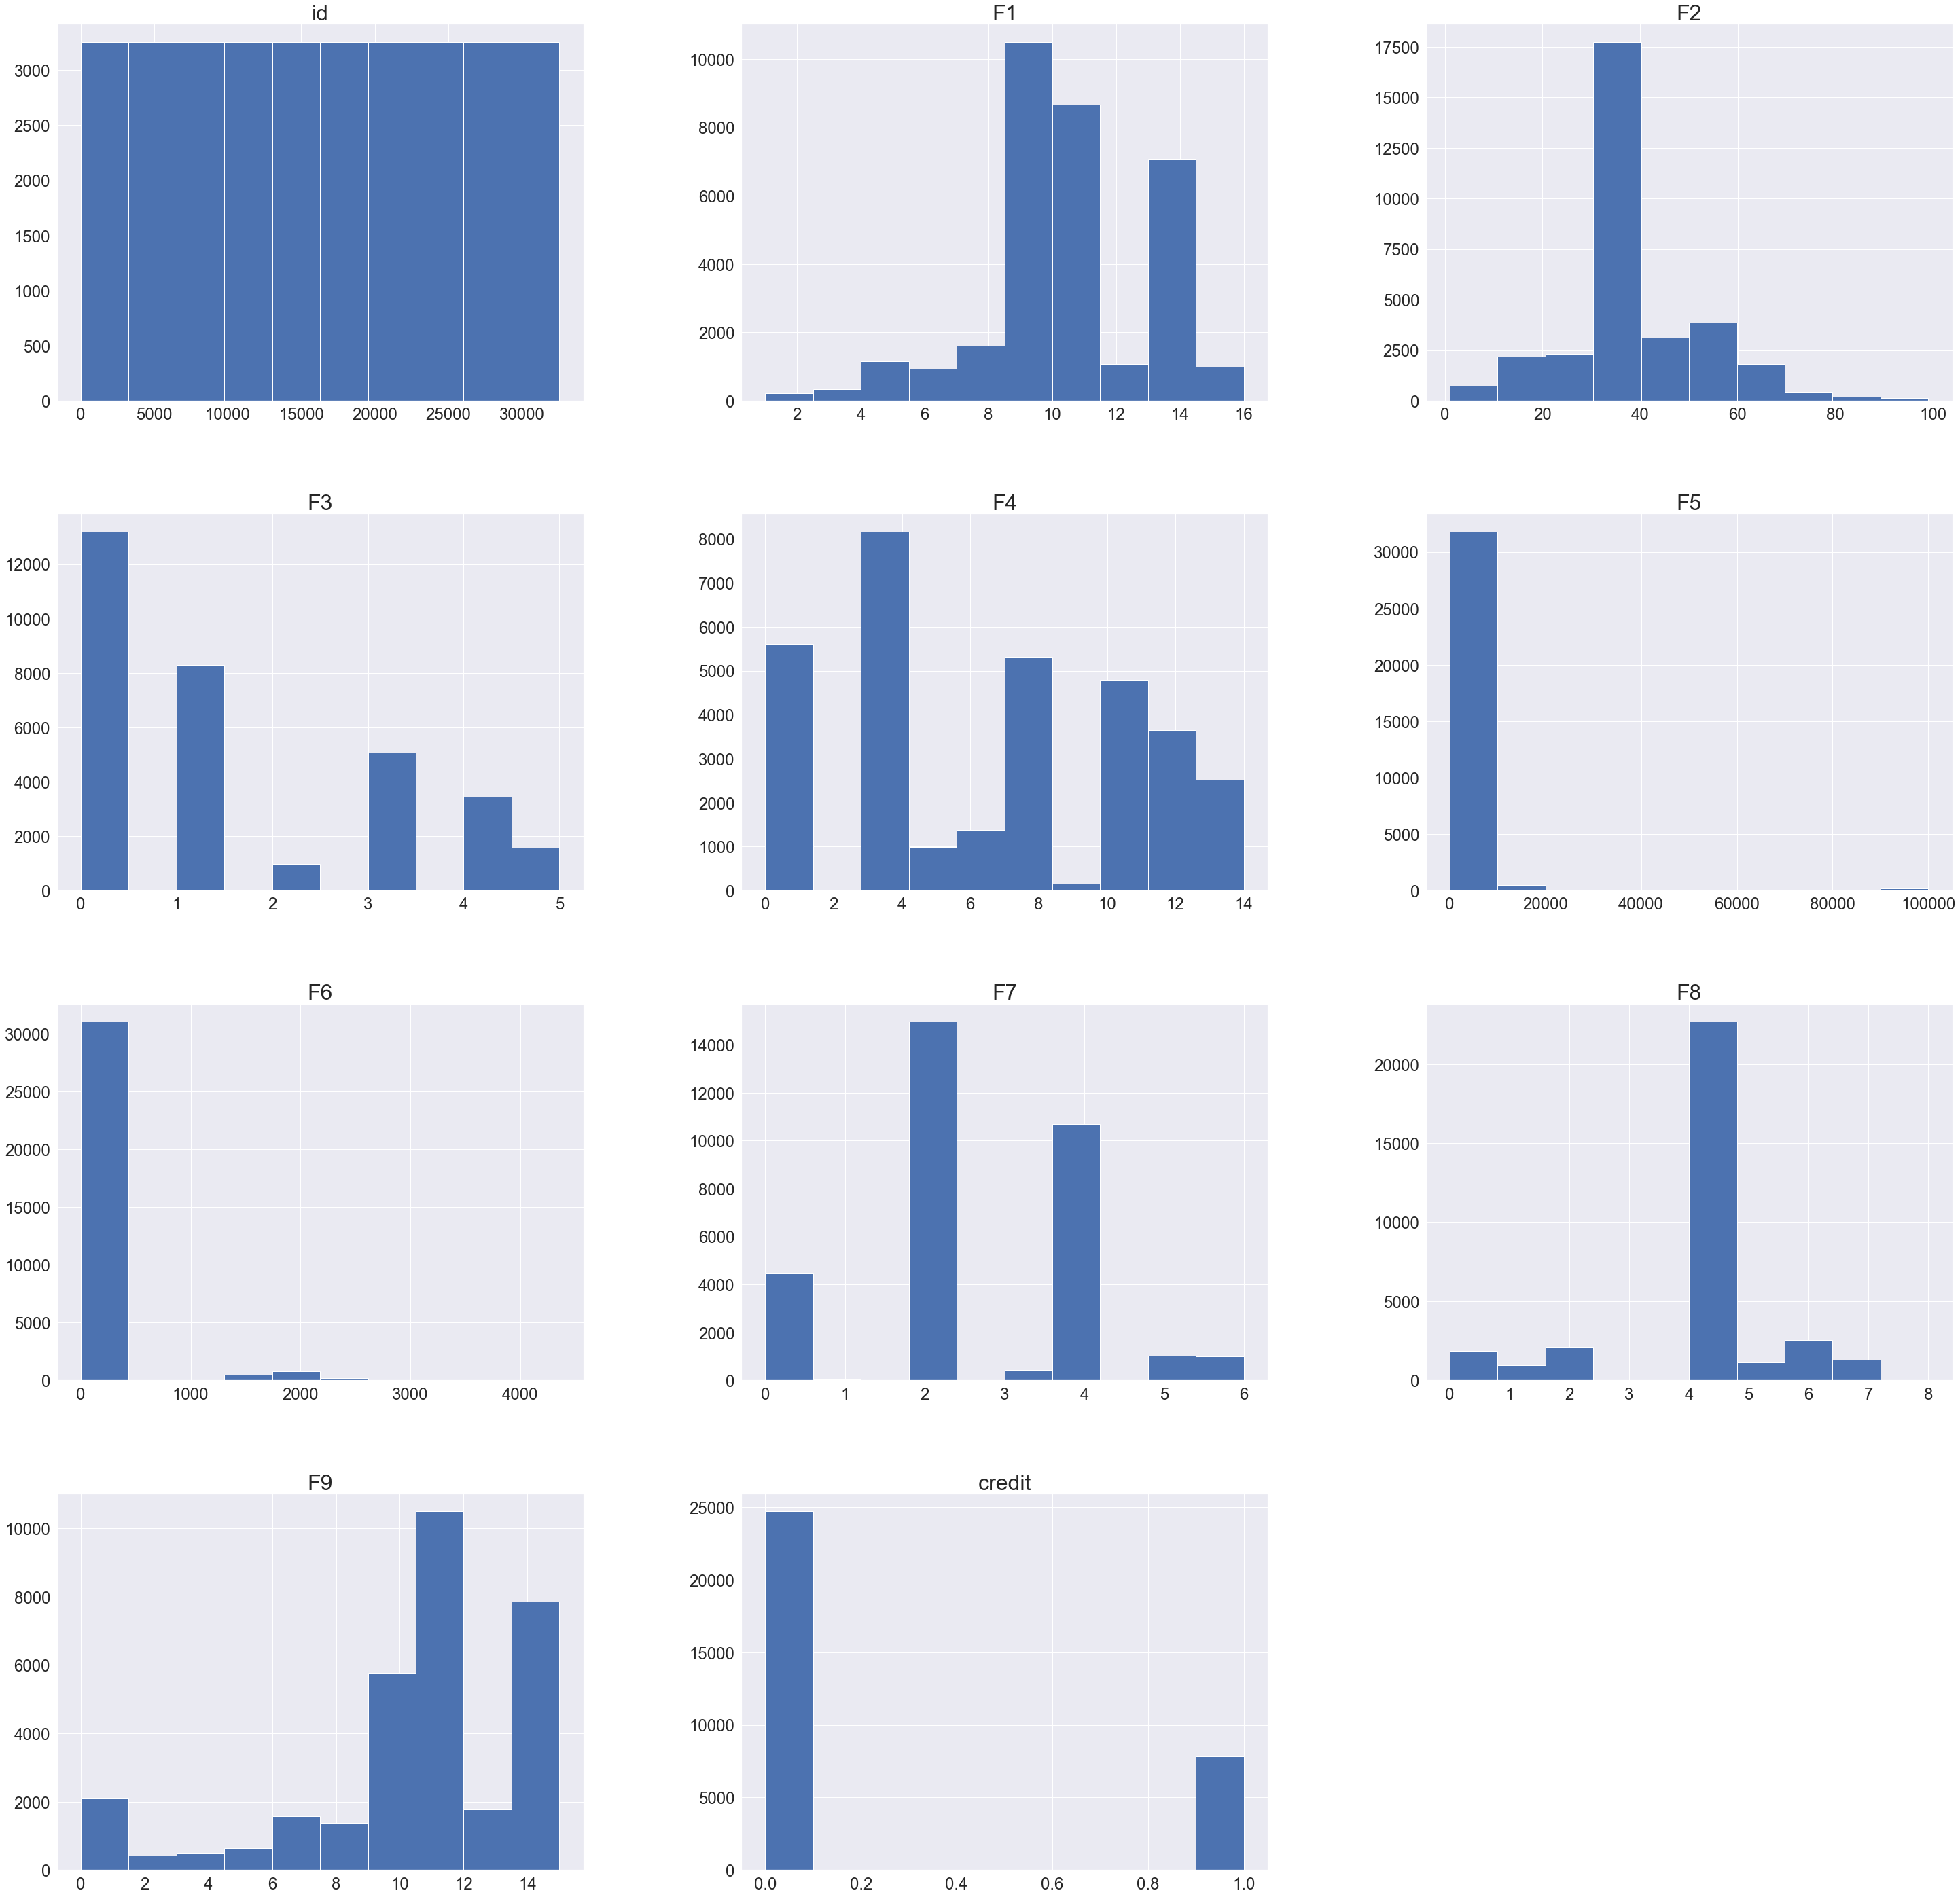

In [51]:
# check distribution of each variable

params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
train_df.hist(figsize=(50,50))

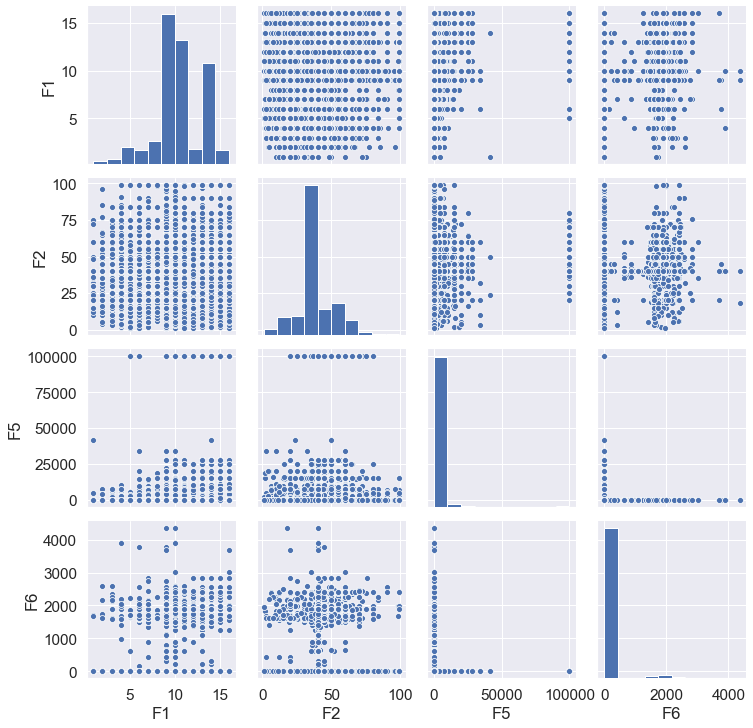

In [63]:
continuous_labels = 'F1 F2 F5 F6'.split()
sns.set(font_scale=1.4)
sns.pairplot(train_df.loc[:, continuous_labels].select_dtypes(include=np.number))

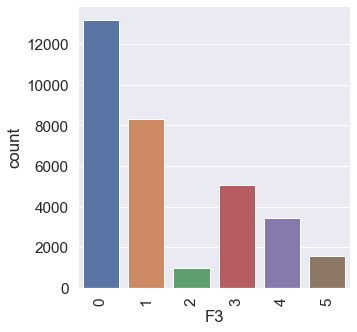

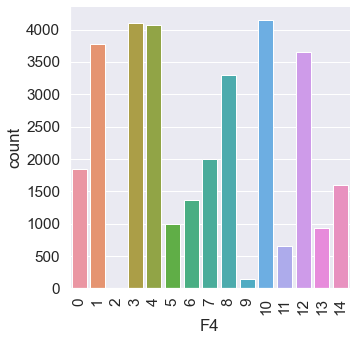

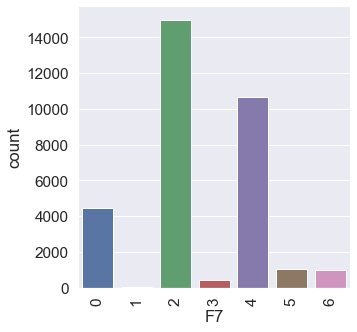

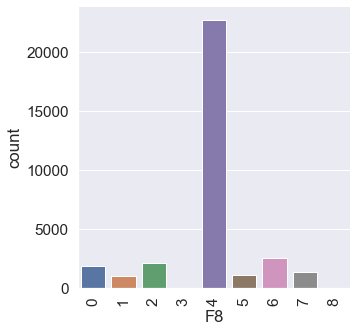

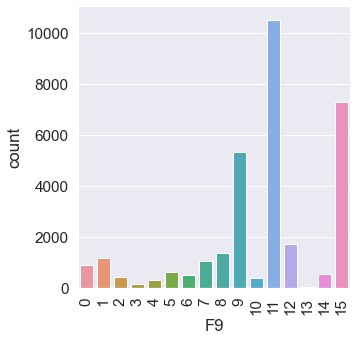

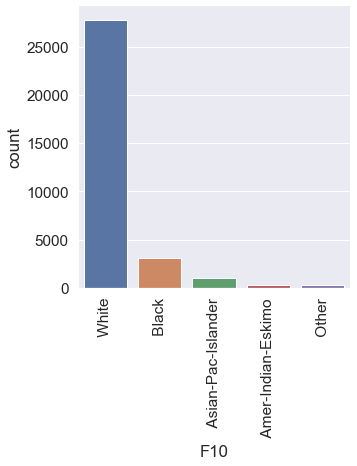

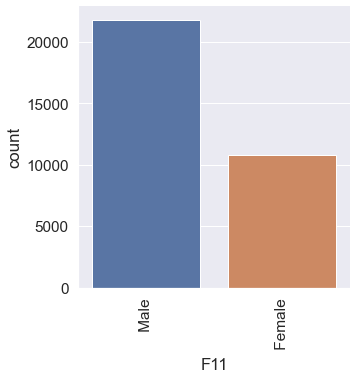

In [62]:
for col in 'F3 F4 F7 F8 F9 F10 F11'.split():
    sns. set(font_scale=1.4)
    fig = sns.catplot(x=col, kind="count", data=train_df, hue=None)
    fig.set_xticklabels(rotation=90)
    plt.show()

### Deal with missing values

In [31]:
train_df.isnull().sum(), train_df.isna().sum()

(id        0
 F1        0
 F2        0
 F3        0
 F4        0
 F5        0
 F6        0
 F7        0
 F8        0
 F9        0
 F10       0
 F11       0
 credit    0
 dtype: int64,
 id        0
 F1        0
 F2        0
 F3        0
 F4        0
 F5        0
 F6        0
 F7        0
 F8        0
 F9        0
 F10       0
 F11       0
 credit    0
 dtype: int64)

Analysis --
There are no null/None values

### co-relation matrix 

In [32]:
train_df.corr()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,credit
id,1.000000,-0.001079,0.000607,-0.004055,-0.001430,0.001672,-0.001188,-0.000401,-0.000166,-0.006697,0.005404
F1,-0.001079,1.000000,0.148123,-0.094153,0.109697,0.122630,0.079923,-0.069304,0.052085,0.359153,0.335154
F2,0.000607,0.148123,1.000000,-0.248974,0.080383,0.078409,0.054256,-0.190519,0.138962,0.055510,0.229689
F3,-0.004055,-0.094153,-0.248974,1.000000,-0.075607,-0.057919,-0.061062,0.185451,-0.090461,-0.010876,-0.250918
F4,-0.001430,0.109697,0.080383,-0.075607,1.000000,0.025505,0.017987,-0.009654,0.254892,-0.021260,0.075468
F5,0.001672,0.122630,0.078409,-0.057919,0.025505,1.000000,-0.031615,-0.043393,0.033835,0.030046,0.223329
F6,-0.001188,0.079923,0.054256,-0.061062,0.017987,-0.031615,1.000000,-0.034187,0.012216,0.016746,0.150526
F7,-0.000401,-0.069304,-0.190519,0.185451,-0.009654,-0.043393,-0.034187,1.000000,-0.064731,-0.038407,-0.199307
F8,-0.000166,0.052085,0.138962,-0.090461,0.254892,0.033835,0.012216,-0.064731,1.000000,0.023513,0.051604
F9,-0.006697,0.359153,0.055510,-0.010876,-0.021260,0.030046,0.016746,-0.038407,0.023513,1.000000,0.079317


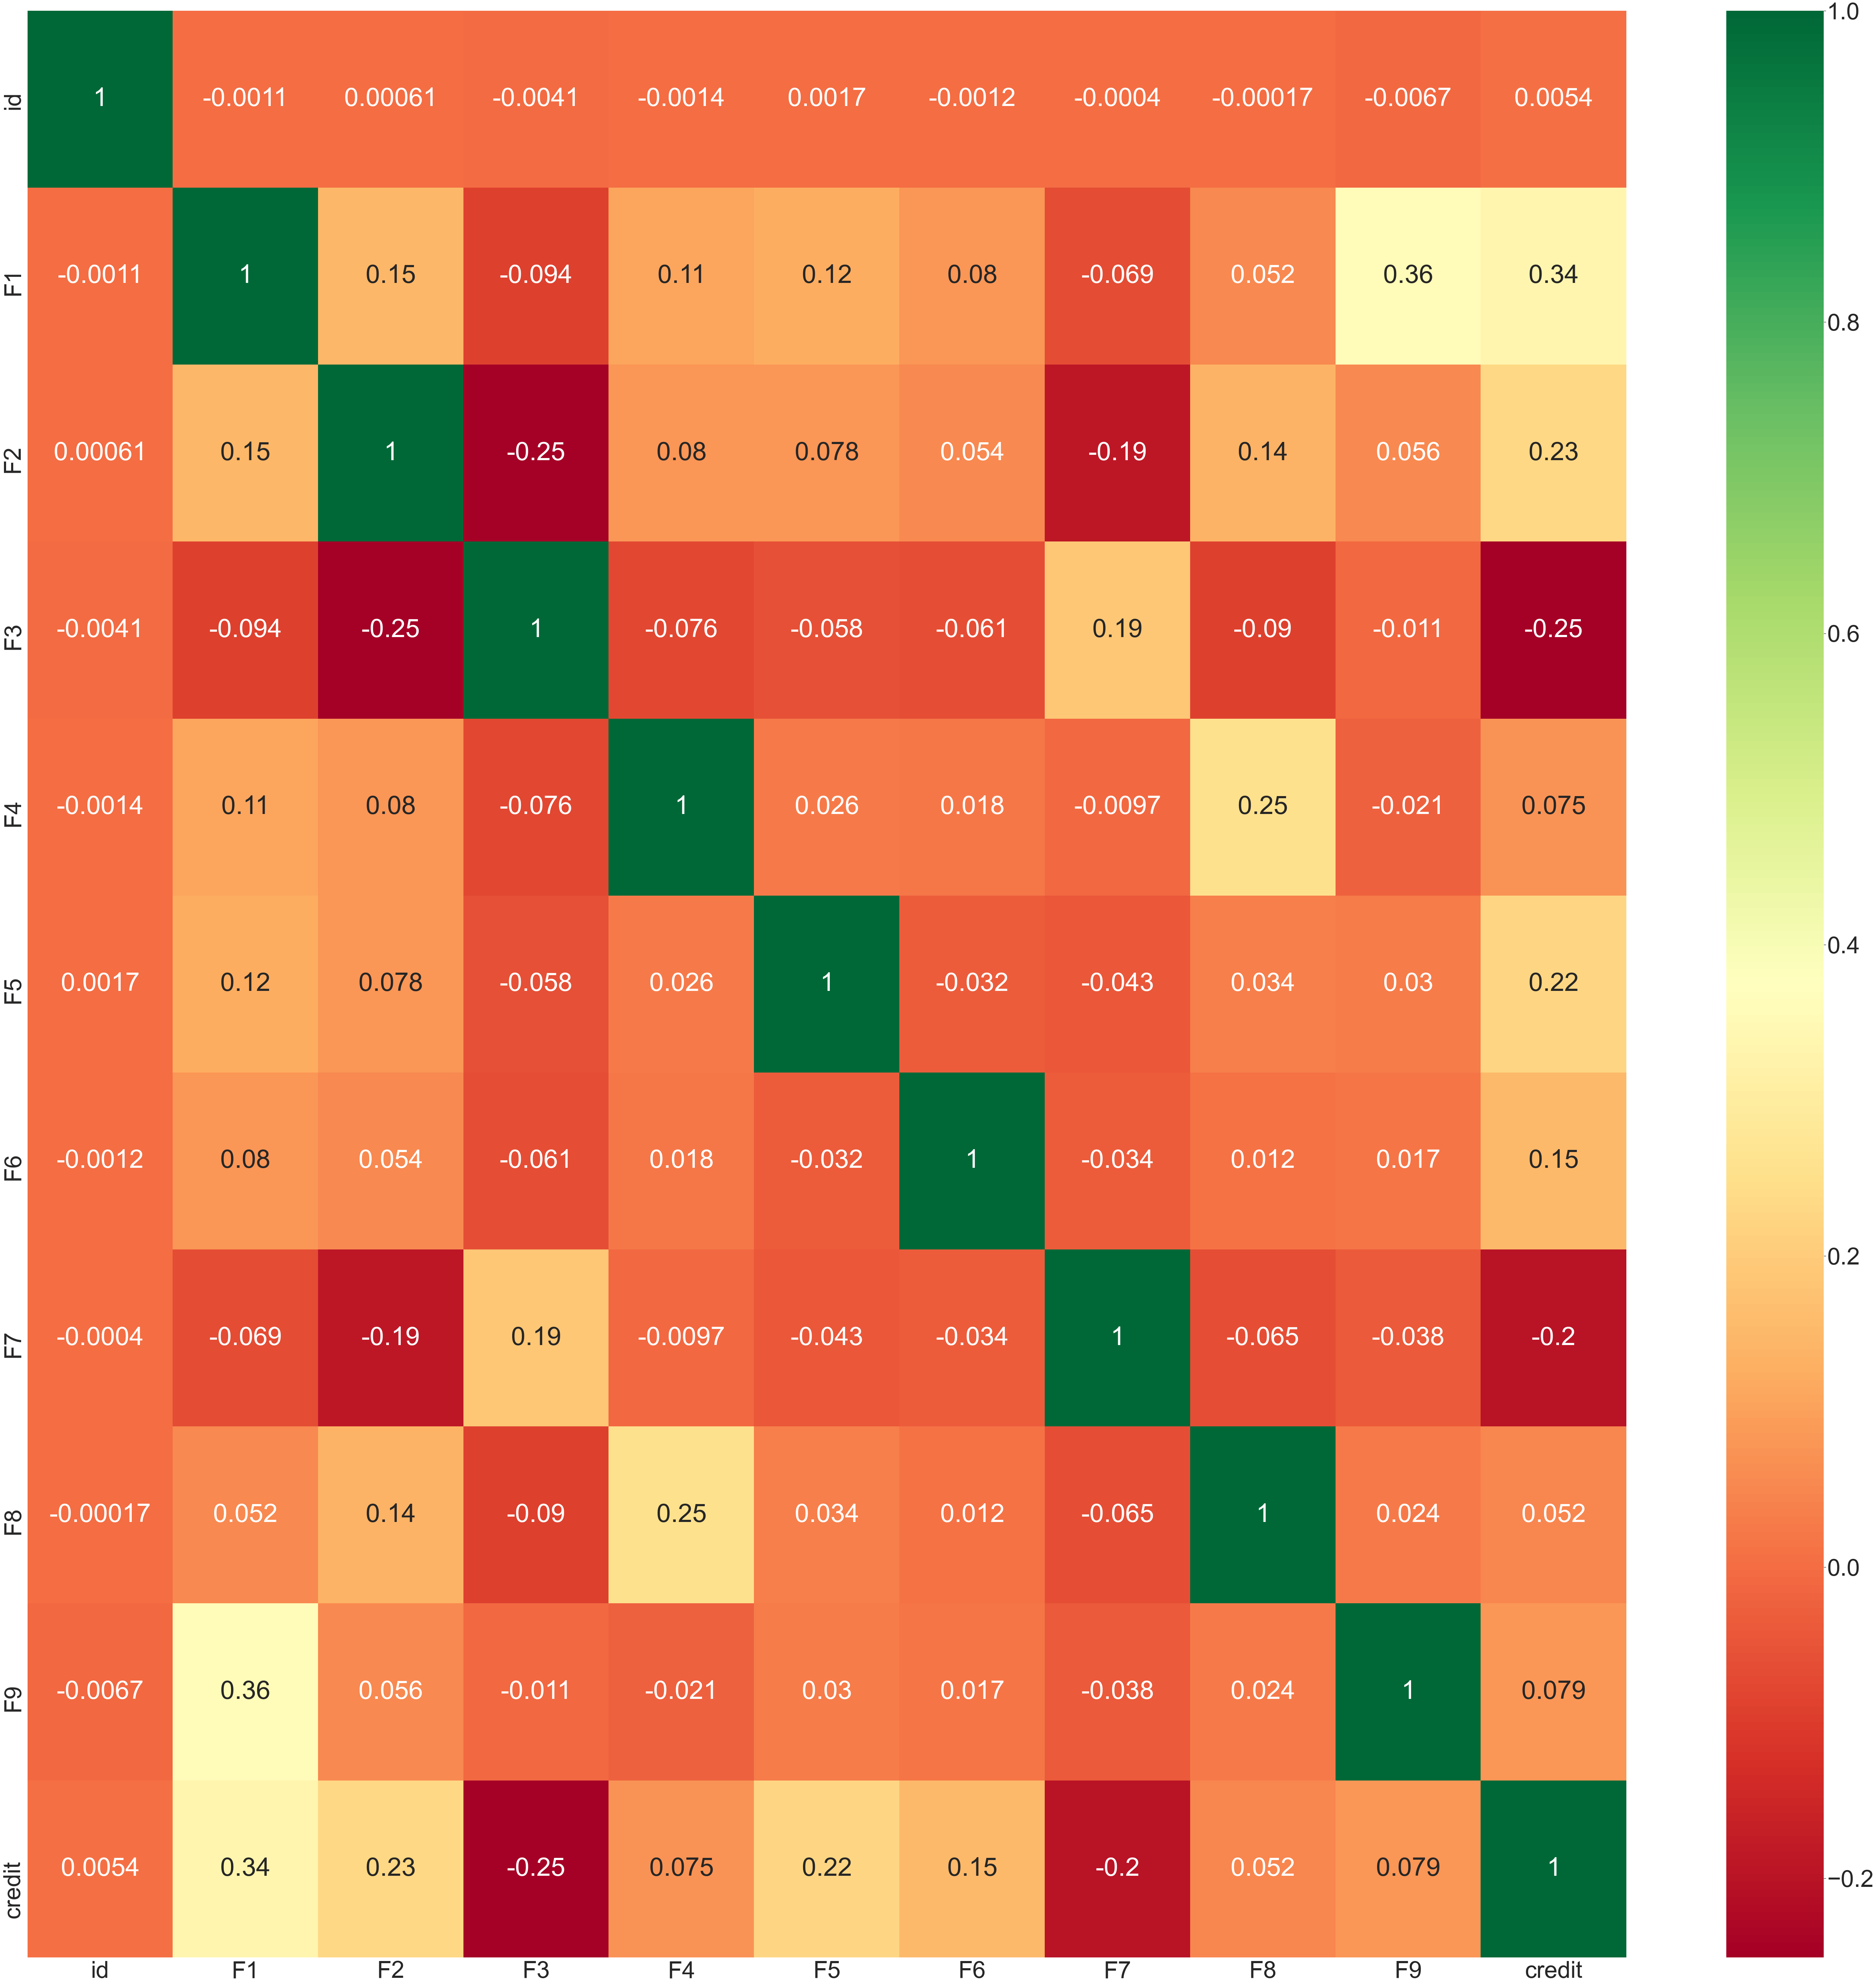

In [37]:
import seaborn as sns

sns.set(font_scale=6)
corrmat = train_df.corr()
top_corr_features = corrmat.index
fig, ax = plt.subplots(figsize=(100,100))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

Analysis --
There is no co-relation i.e. abs(corr)>0.9 between any 2 variables

## Prepare dataset for training 

In [111]:
# ignore features race and gender

X = train_df.loc[:, 'F1 F2 F3 F4 F5 F6 F7 F8 F9'.split()].values
Y = train_df.loc[:, ['credit']].values

X,Y

(array([[13, 40,  1, ...,  4,  7,  9],
        [13, 13,  0, ...,  2,  6,  9],
        [ 9, 40,  1, ...,  0,  4, 11],
        ...,
        [ 9, 40,  4, ...,  6,  4, 11],
        [ 9, 20,  3, ...,  4,  4, 11],
        [ 9, 40,  5, ...,  2,  5, 11]], dtype=int64),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [1]], dtype=int64))

In [84]:
train_df.loc[:, 'F1 F2 F3 F4 F5 F6 F7 F8 F9'.split()].describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,10.080679,40.437456,1.446362,6.572740,1077.648844,87.303830,2.611836,3.868892,10.298210
std,2.572720,12.347429,1.606771,4.228857,7385.292085,402.960219,1.506222,1.455960,3.870264
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,40.000000,0.000000,3.000000,0.000000,0.000000,2.000000,4.000000,9.000000
50%,10.000000,40.000000,1.000000,7.000000,0.000000,0.000000,2.000000,4.000000,11.000000
75%,12.000000,45.000000,3.000000,10.000000,0.000000,0.000000,4.000000,4.000000,12.000000
max,16.000000,99.000000,5.000000,14.000000,99999.000000,4356.000000,6.000000,8.000000,15.000000


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
len(X_train), len(X_test), len(Y_train), len(Y_test)

(26048, 6513, 26048, 6513)

## Feature Scaling

Scale the continuous variables  
Not required with decision trees and XgBoost

## Training model and evaluating results

### train and evaluate

In [194]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [195]:
# fit model
model = XGBClassifier()
model.fit(X_train, Y_train)

[02:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [196]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions 
print("Accuracy: %.2f%%" % (accuracy_score(Y_test, predictions) * 100.0))
print("precision score: %.2f%%" % (precision_score(Y_test, predictions) * 100.0))
print("recall score: %.2f%%" % (recall_score(Y_test, predictions) * 100.0))
print("F1 score: %.2f%%" % (f1_score(Y_test, predictions) * 100.0))
print('\nconfusion matrix\n', confusion_matrix(Y_test, predictions))

Accuracy: 86.52%
precision score: 76.98%
recall score: 64.14%
F1 score: 69.97%

confusion matrix
 [[4612  306]
 [ 572 1023]]


### k-fold cross validation

In [116]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# define model
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, Y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1 score: %.5f' % mean(scores))

Mean F1 score: 0.69733


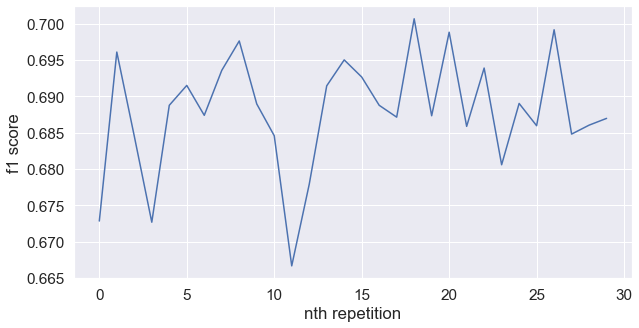

In [208]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(list(range(len(scores))), scores)
plt.xlabel("nth repetition")
plt.ylabel("f1 score")
plt.show()

### train and evaluate - class imbalance

In [201]:
# fit model
model = XGBClassifier(scale_pos_weight=3)
model.fit(X_train, Y_train)

[02:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=3, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [202]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions 
print("Accuracy: %.2f%%" % (accuracy_score(Y_test, predictions) * 100.0))
print("precision score: %.2f%%" % (precision_score(Y_test, predictions) * 100.0))
print("recall score: %.2f%%" % (recall_score(Y_test, predictions) * 100.0))
print("F1 score: %.2f%%" % (f1_score(Y_test, predictions) * 100.0))
print('\nconfusion matrix\n', confusion_matrix(Y_test, predictions))

Accuracy: 81.81%
precision score: 59.01%
recall score: 84.20%
F1 score: 69.39%

confusion matrix
 [[3985  933]
 [ 252 1343]]


Find optimal value of *scale_pos_weight* to maximize f1 score

Mean F1 score: 0.69733
Mean F1 score: 0.71404
Mean F1 score: 0.70180
Mean F1 score: 0.68789


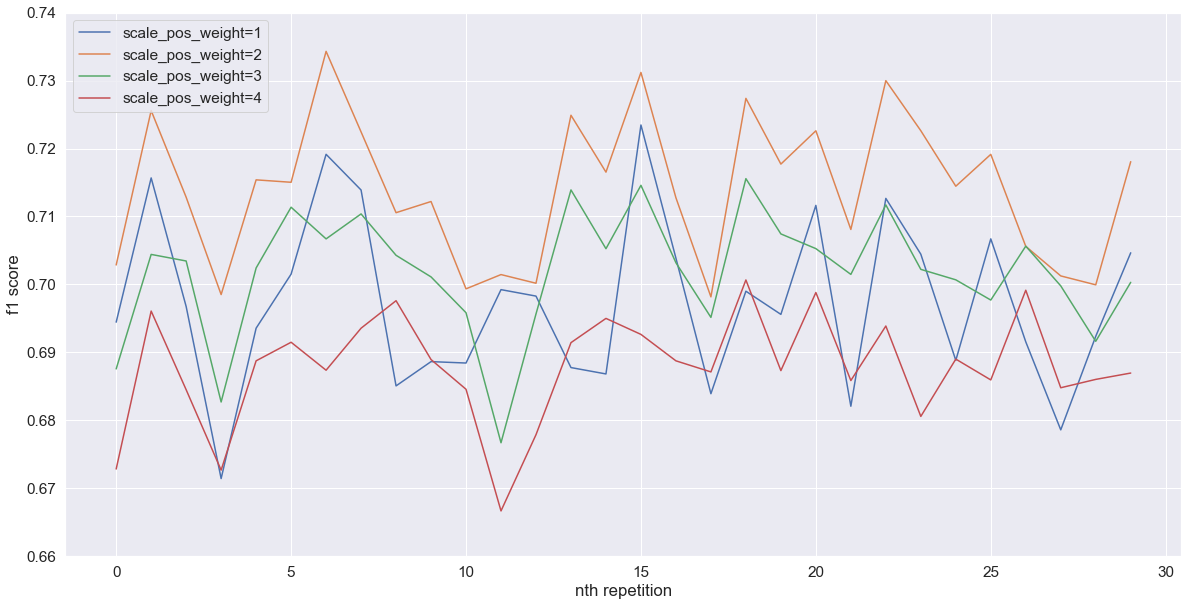

In [189]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

f1_score = []
weight = [1,2,3,4]
plt.rcParams["figure.figsize"] = (20,10)

for w in weight:
    # define model
    model = XGBClassifier(scale_pos_weight=w)
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, Y, scoring='f1', cv=cv, n_jobs=-1)
    # summarize performance
    print('Mean F1 score: %.5f' % mean(scores))
    plt.plot(list(range(len(scores))), scores, label='scale_pos_weight='+str(w))
    f1_score.append(mean(scores))
plt.xlabel("nth repetition")
plt.ylabel("f1 score")
plt.legend(loc="upper left")
plt.ylim(0.66, 0.74)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

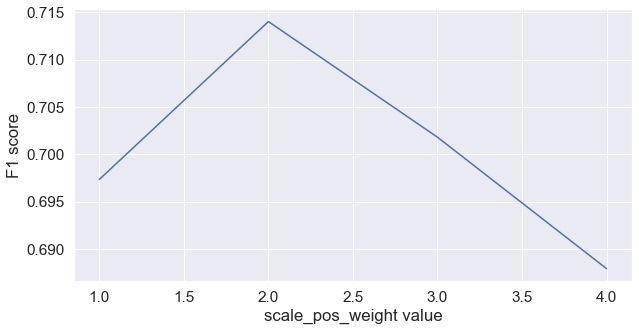

In [187]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(weight, f1_score)
plt.xlabel("scale_pos_weight value")
plt.ylabel("F1 score")
plt.show()

Most optimal value of scale_pos_weight = 2

In [199]:
# best fit model for f1 score metric
model = XGBClassifier(scale_pos_weight=2)
model.fit(X_train, Y_train)

[02:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [200]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions 
print("Accuracy: %.2f%%" % (accuracy_score(Y_test, predictions) * 100.0))
print("precision score: %.2f%%" % (precision_score(Y_test, predictions) * 100.0))
print("recall score: %.2f%%" % (recall_score(Y_test, predictions) * 100.0))
print("F1 score: %.2f%%" % (f1_score(Y_test, predictions) * 100.0))
print('\nconfusion matrix\n', confusion_matrix(Y_test, predictions))

Accuracy: 84.55%
precision score: 65.44%
recall score: 78.24%
F1 score: 71.27%

confusion matrix
 [[4259  659]
 [ 347 1248]]


## Future Work

### use oversampling techniques to get rid of class imbalance